In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

from sklearn.preprocessing import OneHotEncoder  
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OrdinalEncoder

import sys
sys.path.append("../")
import src.soporte as sp

In [2]:
df = pd.read_csv("../data/train.csv")

In [3]:
df.drop(["id"], axis = 1, inplace = True)

In [4]:
sp.analisis_basico(df)

+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

Estructura de los datos: (40455, 10)


,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183


+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

Número de filas duplicadas:
85
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

Columnas, Nulos y Dtypes:


,nulos,dtypes
carat,0,float64
cut,0,object
color,0,object
clarity,0,object
depth,0,float64
table,0,float64
x,0,float64
y,0,float64
z,0,float64
price,0,float64


+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

Descripción de las variables tipo Numéricas:


,count,mean,std,min,25%,50%,75%,max
carat,40455.0,0.797576,0.475939,0.200,0.400,0.70,1.040,5.010
depth,40455.0,61.746377,1.436796,43.000,61.000,61.80,62.500,79.000
table,40455.0,57.451694,2.234569,44.000,56.000,57.00,59.000,95.000
x,40455.0,5.729163,1.125244,0.000,4.710,5.69,6.540,10.740
y,40455.0,5.732896,1.154799,0.000,4.720,5.70,6.540,58.900
z,40455.0,3.537351,0.711002,0.000,2.910,3.52,4.030,31.800
price,40455.0,7.783822,1.016828,5.787,6.851,7.78,8.581,9.842


+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

Descripción de las variables tipo Categóricas:


,count,unique,top,freq
cut,40455,5,Ideal,16230
color,40455,7,G,8410
clarity,40455,8,SI1,9779


+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+



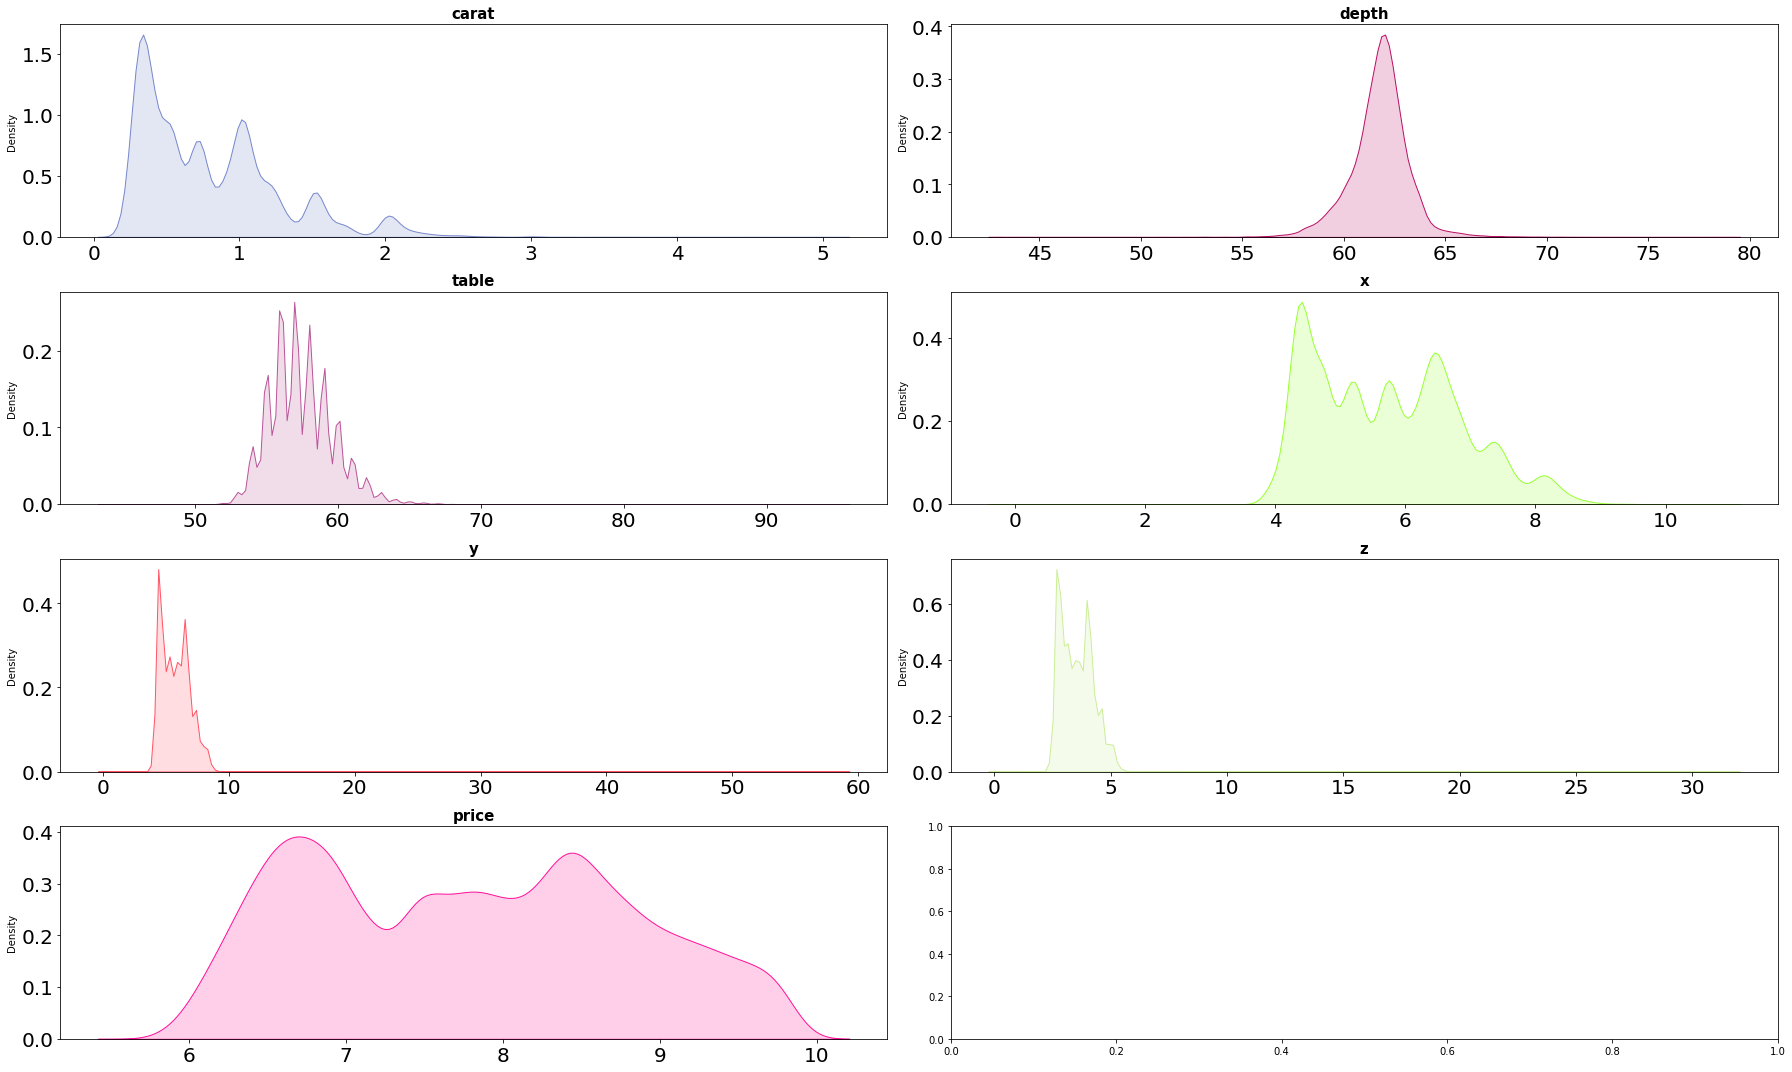

In [5]:
sp.distribucion_numericas(df)

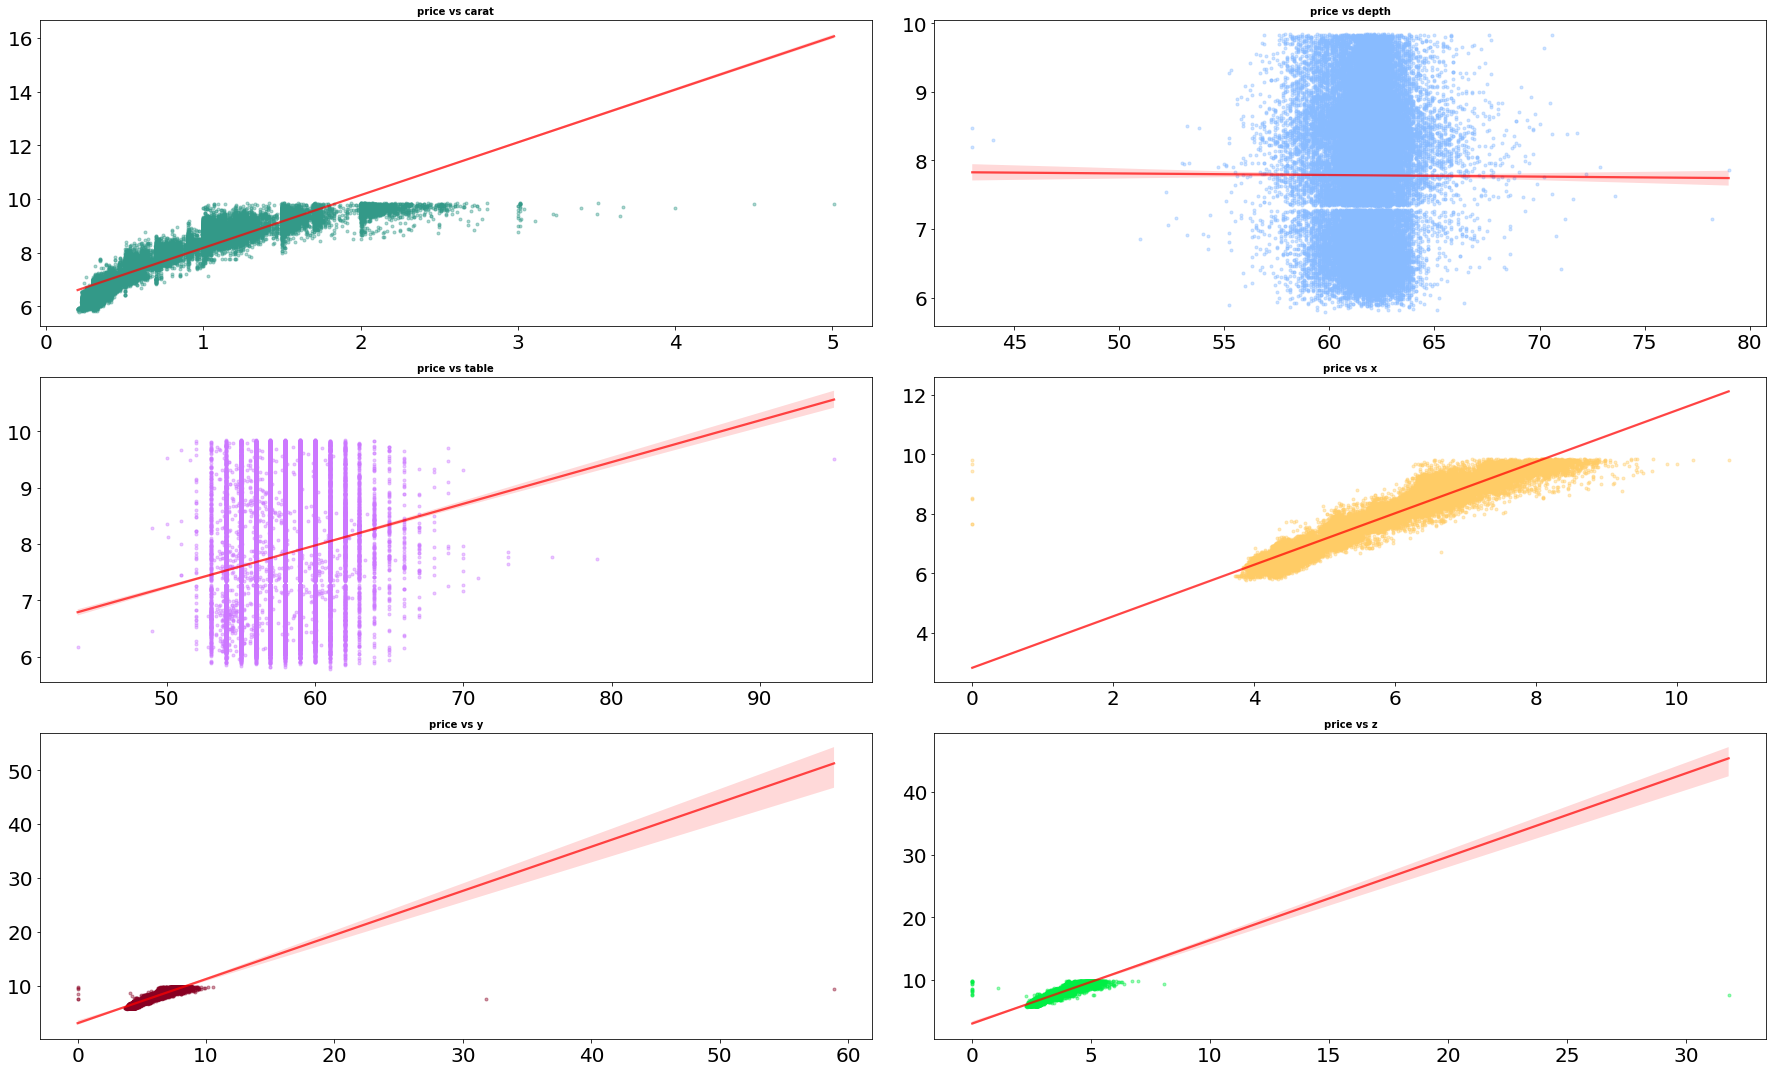

In [6]:
sp.correla_respuesta_num(df,"price")

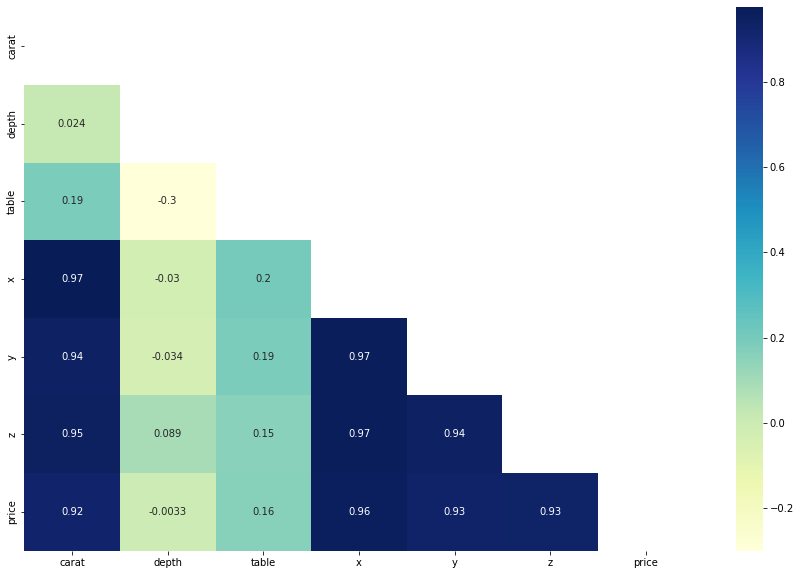

In [7]:
sp.correla_map(df)

In [8]:
df.drop(["depth", "table"], axis = 1, inplace = True)

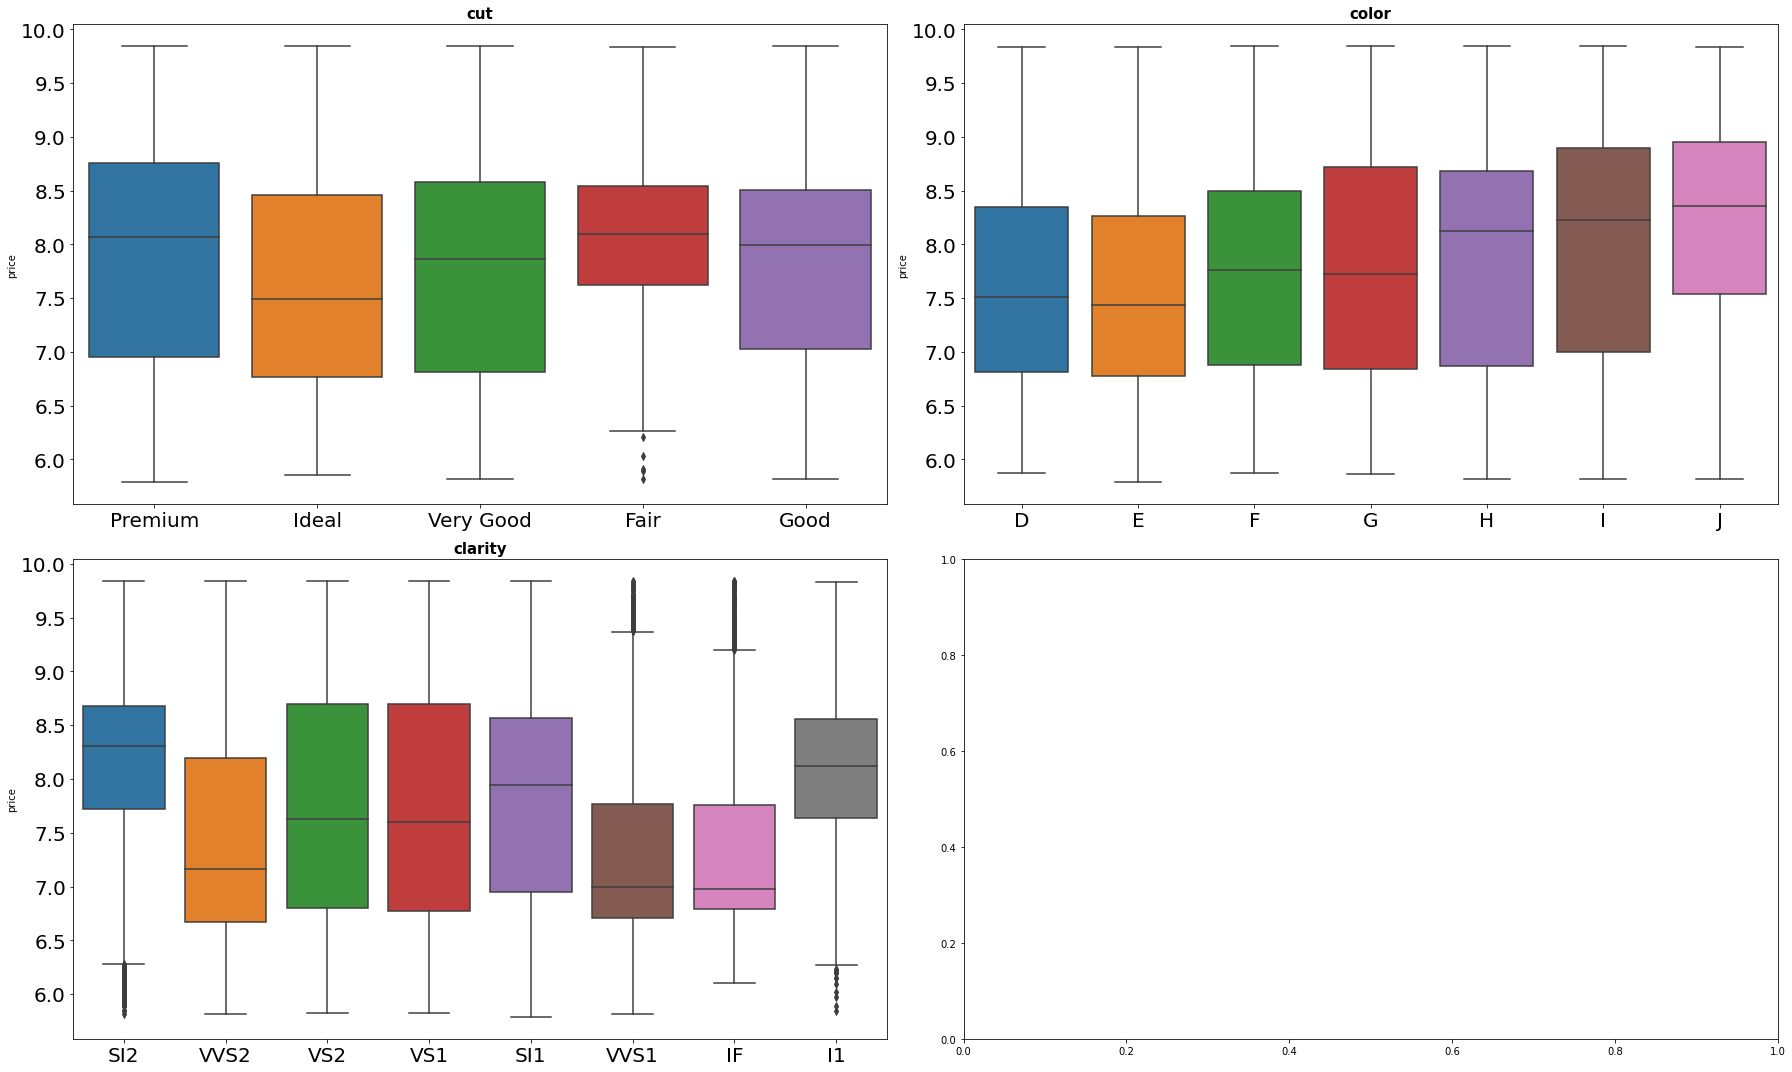

In [9]:
sp.correla_respuesta_cate(df, "price")

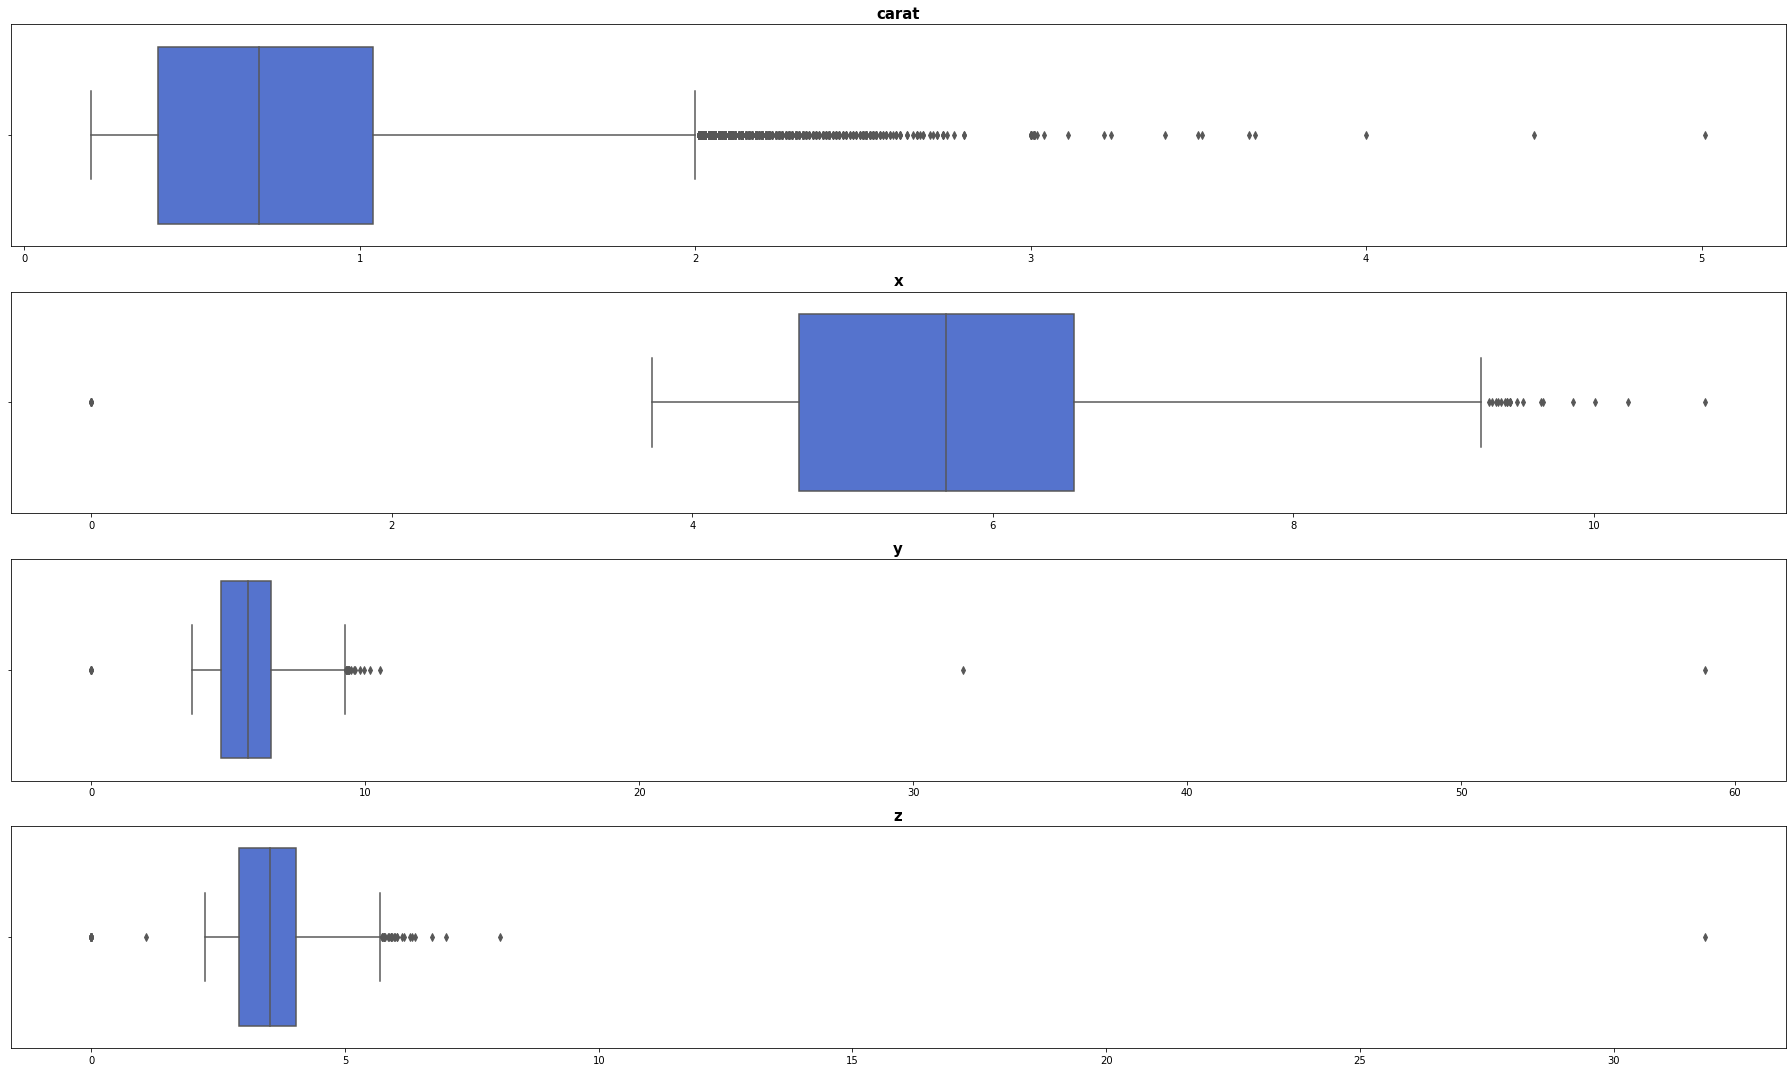

In [10]:
sp.outlier_boxplot(df, "price")

In [11]:
especial = {"carat" : {"top" : 2.9},
            "x" : {"top" : 15},
            "y" : {"top" : 20},
            "z" : {"top" : 10}}
out = sp.detectar_outliers(df, "price", especial)


In [12]:
df_sin_out = sp.tratar_outliers(df, out, "null")

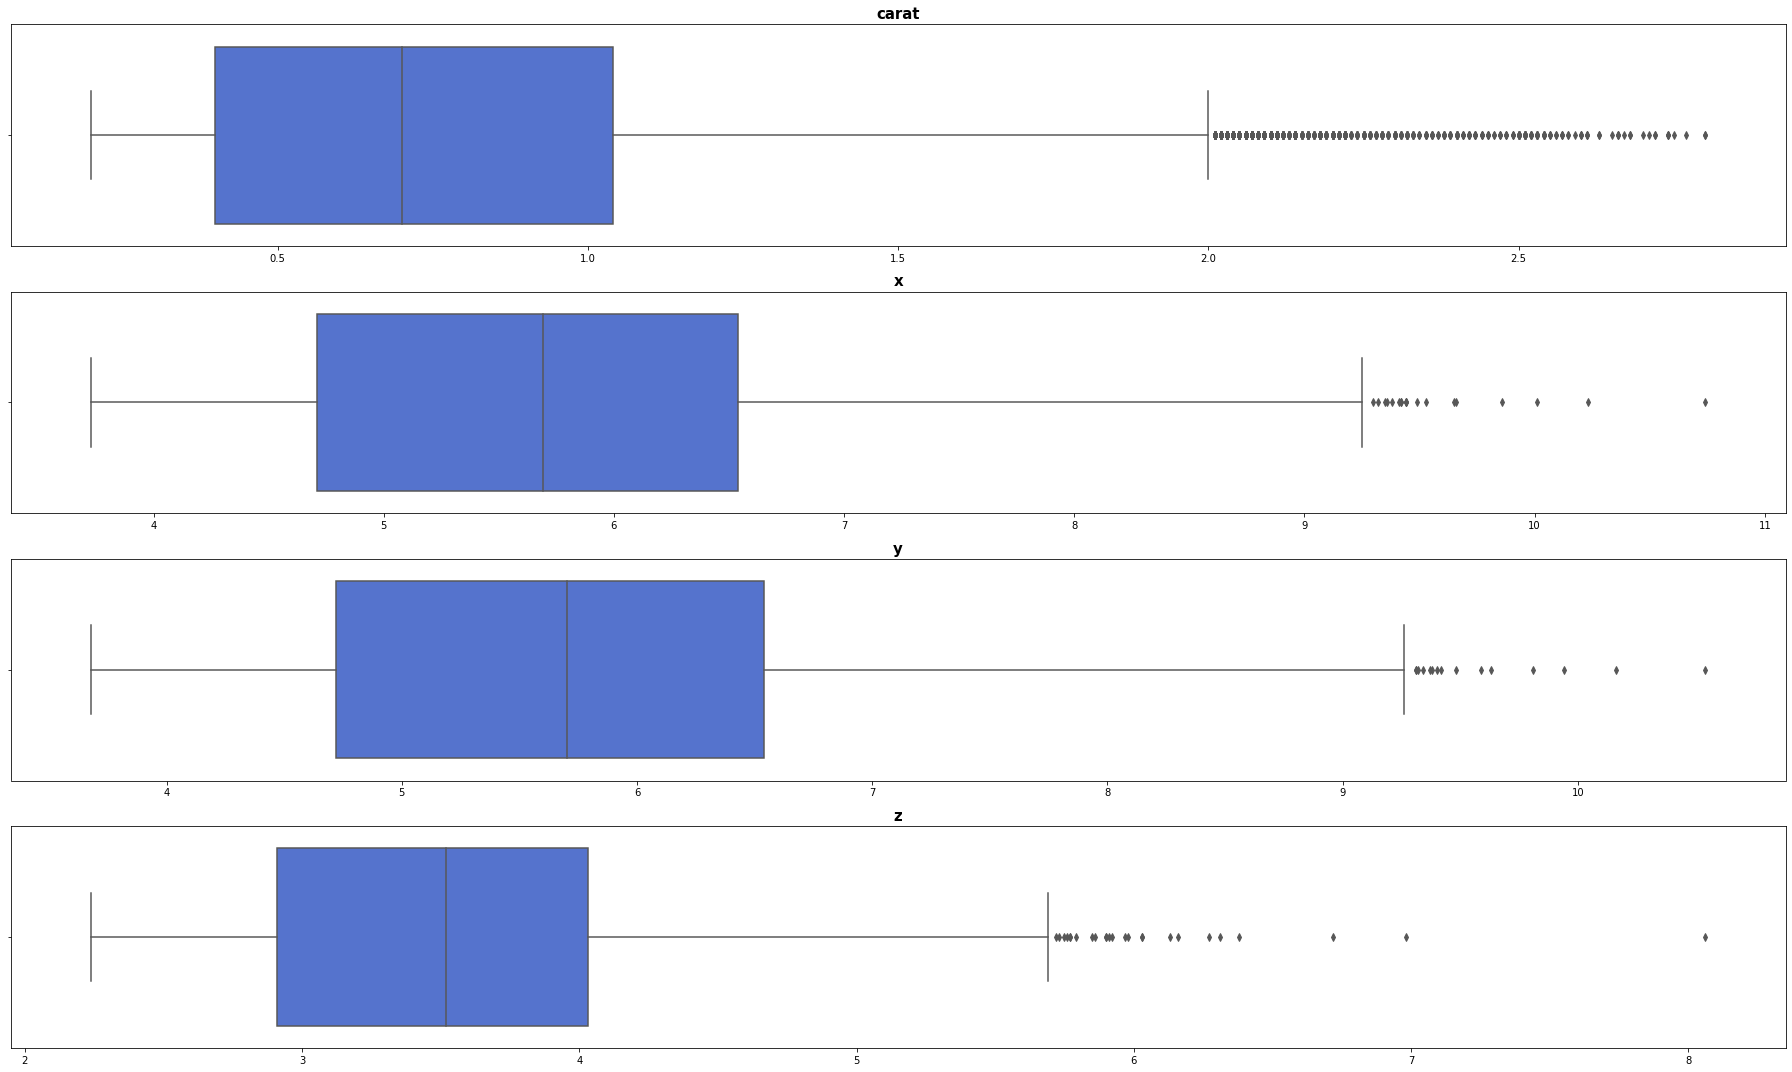

In [13]:
sp.outlier_boxplot(df_sin_out, "price")

In [14]:
df2 = sp.tratamiento_nulos_num(df_sin_out, metodo = "iterative", respuesta = "price")

In [15]:
encoding = {"cut": {"ordinal": ["Ideal", "Very Good", "Good", "Fair", "Premium"]},
        "color": {"map": {"D": 1, "E": 1, "F": 2, "G": 2, "H": 3, "I": 3, "J": 4}},
        "clarity": {"map" : {"VVS1": 1 , "IF": 1, "VVS2": 2, "VS2": 3, "VS1": 3, "SI1": 4, "SI2": 5, "I1":5 }}}
df_enconded = sp.encoder(df2, encoding)

In [16]:
df_enconded.head()

,cut,color,clarity,price,carat,x,y,z
0,4,1,5,6.353,0.30,4.31,4.28,2.68
1,0,1,2,9.183,1.01,6.42,6.46,4.04
2,0,2,3,7.983,0.72,5.71,5.74,3.54
3,1,2,5,8.371,1.08,6.54,6.50,4.12
4,4,2,3,6.588,0.36,4.50,4.55,2.82


In [17]:
def modelos_num(dataframe, respuesta, lista, parametros_tree, comparativa = True, modelo = 0, random_state = 42, test_size = 0.2):
    X = dataframe.drop(respuesta, axis = 1)
    y = dataframe[respuesta]
    if comparativa == True:
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = test_size, random_state = random_state)

In [18]:
parametros = sp.mejores_parametros_num(df_enconded, "price")

In [19]:
print(parametros)

{'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 20, 24, 28, 32, 36], 'min_samples_split': [25, 50, 75, 100, 125, 150, 175, 200], 'min_leaf_split': [25, 50, 75, 100, 125, 150, 175, 200], 'max_features': [1, 2, 3]}


In [20]:
listaa= [1,2,3,4,5]
listab = [6,7,8,9]
listaa + listab

[1, 2, 3, 4, 5, 6, 7, 8, 9]